In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


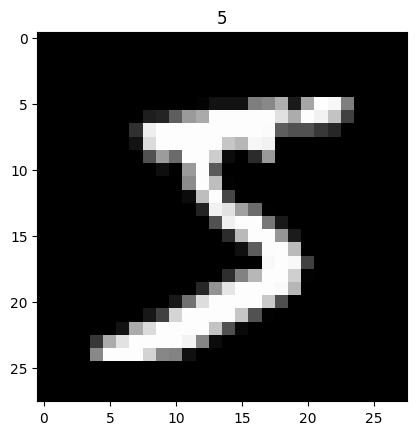

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [ ]:
#Normalizando:
#evitar vazemento de dados
mean = X_train.mean()
std = X_train.std()

X_train_norm = (X_train - mean)/ std
X_test_norm = (X_test - mean)/ std

##Fully connected neural network:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten #Flatten achata a dimensão

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8916 - loss: 0.3491 - val_accuracy: 0.9610 - val_loss: 0.1238
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9695 - loss: 0.0995 - val_accuracy: 0.9717 - val_loss: 0.0926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9785 - loss: 0.0676 - val_accuracy: 0.9739 - val_loss: 0.0907
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9731 - val_loss: 0.0900
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9874 - loss: 0.0392 - val_accuracy: 0.9718 - val_loss: 0.0962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9721 - val_loss: 0.1046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9911 - loss: 0.02

In [ ]:
df = pd.DataFrame(hist.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.934600,0.213051,0.9610,0.123823
1,0.969267,0.099282,0.9717,0.092573
2,0.977100,0.071423,0.9739,0.090667
3,0.982183,0.055991,0.9731,0.089963
4,0.985667,0.043554,0.9718,0.096182
5,0.987467,0.037992,0.9762,0.084090
6,0.989467,0.031741,0.9721,0.104596
7,0.990900,0.026888,0.9789,0.096839
8,0.991200,0.024926,0.9765,0.101240
9,0.992533,0.021557,0.9760,0.105462


<Axes: >

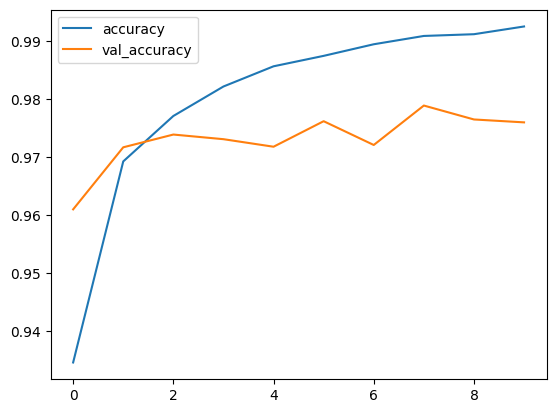

In [ ]:
df[["accuracy", "val_accuracy"]].plot()

<Axes: >

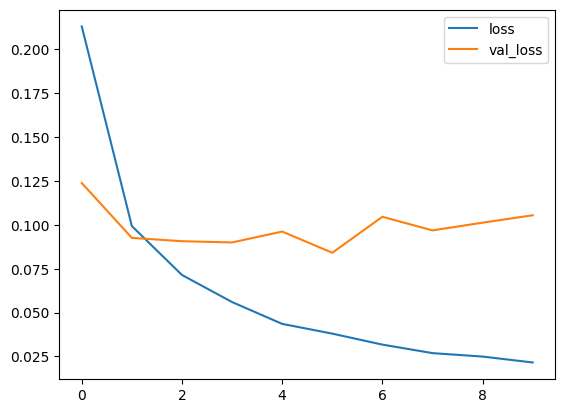

In [ ]:
df[["loss", "val_loss"]].plot()

In [ ]:
#conclusão:
# o modelo está aprensentando indícios de overfitting, pois ele está aprendendo bem com o conjunto de treinamento(apresentando uma acurácia de 99%)
# porém não está generalizando tão bem para o conjunto de validação(ao apresentar uma acurácia de 97%)

#Além disso, perceba que val_loss aumenta nas últimas épocas,
#enquanto a perda de treinamento continua diminuindo, o que reforça a hipótese de overfitting.


##One Conv-Layer


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input

X_train_norm = X_train_norm.reshape(60000, 28, 28, 1)

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(6, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4056)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 120)            │       486,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,010 (1.91 MB)

 Trainable params: 500,010 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9030 - loss: 0.3133 - val_accuracy: 0.9717 - val_loss: 0.0931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0678 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9798 - val_loss: 0.0644
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0208 - val_accuracy: 0.9761 - val_loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9838 - val_loss: 0.0603
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9810 - val_loss: 0.0770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.9819 - val_loss: 0.0724
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.007

<Axes: >

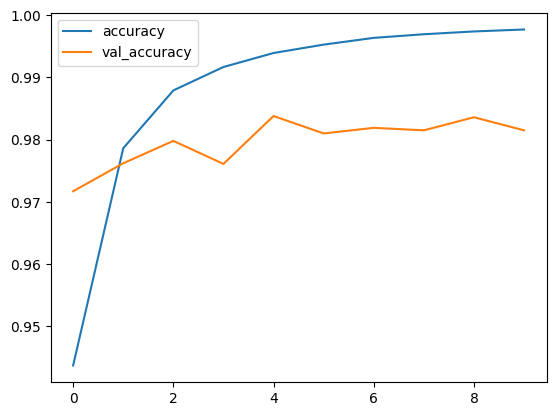

In [ ]:
df = pd.DataFrame(hist.history)
df[["accuracy", "val_accuracy"]].plot()

In [ ]:
#ainda tende ao overfitting

##Two Conv-layers + MaxPooling

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(6, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, kernel_size=(3,3),  activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8907 - loss: 0.3596 - val_accuracy: 0.9827 - val_loss: 0.0549
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0400 - val_accuracy: 0.9861 - val_loss: 0.0421
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9860 - val_loss: 0.0450
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9873 - val_loss: 0.0417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0204 - val_accuracy: 0.9877 - val_loss: 0.0401
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9890 - val_loss: 0.0408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9958 - loss: 0.0127 

<Axes: >

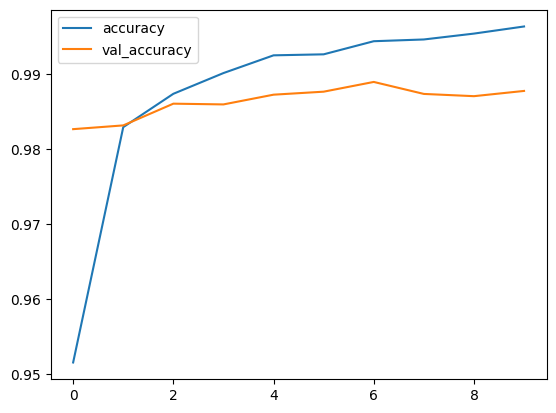

In [ ]:
df = pd.DataFrame(hist.history)
df[["accuracy", "val_accuracy"]].plot()

In [ ]:
model.save('best_model.h5')

##Visualizing Conv Filters

In [ ]:
conv_layer_0 = model.layers[0]

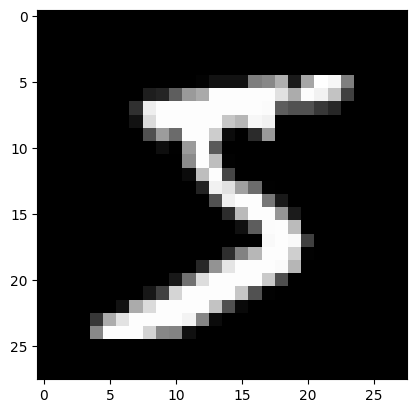

In [ ]:
x=X_train_norm[0].reshape(1, 28, 28, 1)
plt.imshow(x.reshape(28,28), cmap='gray')


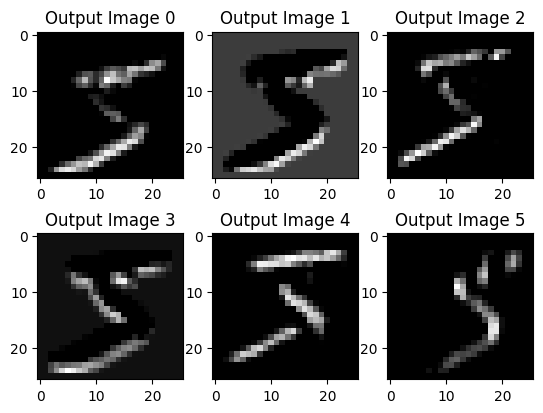

In [ ]:
output_imgs = conv_layer_0(x)

for idx in range(6):
      img=output_imgs[:, :, :, idx].numpy().reshape(26,26)
      plt.subplot(2, 3, idx + 1)
      plt.imshow(img, cmap='gray')
      plt.title(f'Output Image {idx}')